<a href="https://colab.research.google.com/github/asdfasdf001234/2024-1-MLPRJ/blob/main/grayworld_final_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [2]:
pip install matplotlib

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = '/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만'
output_path='/content/drive/MyDrive/whitebalancing'

In [6]:
def wb_gray_world(image):
    image = image / 255.0 #0~255의 값을 0~1사이의 값으로 정규화
    #image = image.astype(np.float32)
    pWhite = 0.03 # 이미지에서 흰색 픽셀의 비율 설정, 작을수록 밝은 영역이 적어짐. 대개 얼굴영역에서는 0.01~0.05의 값-> 중간치인 0.3을

    red = image[:, :, 2]
    green = image[:, :, 1]
    blue = image[:, :, 0]

    red = red / np.mean(red)
    green = green / np.mean(green)
    blue = blue / np.mean(blue)

    red_sorted = sorted(red.ravel())
    green_sorted = sorted(green.ravel())
    blue_sorted = sorted(blue.ravel())

    total = len(red_sorted)

    max_index = int(total * (1. - pWhite)) #흰색 픽셀을 제외한 픽셀중 가장 큰 값의 인덱스를 계산
    image[:, :, 2] = red / red_sorted[max_index]
    image[:, :, 1] = green / green_sorted[max_index]
    image[:, :, 0] = blue / blue_sorted[max_index]

    image = np.clip(image * 255.0, 0, 255).astype(np.uint8)

    return image

In [8]:
#화이트 밸런싱 수행 제대로 됬는지 디버깅용 코드#

def funct(data_path, output_path):
    img_list = glob(os.path.join(data_path, '*.jpg'))

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for img_path in img_list:
        image = cv2.imread(img_path)

        # OpenCV는 이미지를 BGR 형식으로 로드하므로 RGB로 변환
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #화이트 밸런싱 알고리즘 수행
        whitebalanced_image = wb_gray_world(image_rgb)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(whitebalanced_image)
        plt.title('White Balanced Image')
        plt.axis('off')

        plt.show()

IndentationError: unexpected indent (<ipython-input-8-095b3ef194f2>, line 2)

In [7]:
#화이트 밸런싱 수행 후 드라이브 폴더에 저장하기 위한 코드
def funct(data_path, output_path):

    img_list = glob(os.path.join(data_path, '*.jpg'))

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for img_path in img_list:
        image = cv2.imread(img_path)
        print(img_path)

        # OpenCV는 이미지를 BGR 형식으로 로드하므로 RGB로 변환
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #화이트 밸런싱 알고리즘 수행
        whitebalanced_image = wb_gray_world(image_rgb)

        if whitebalanced_image.dtype != np.uint8:
            whitebalanced_image = whitebalanced_image.astype(np.uint8)

        #다시 BGR로 바꾸어 저장
        whitebalanced_image_bgr = cv2.cvtColor(whitebalanced_image, cv2.COLOR_RGB2BGR)

        file_name = os.path.basename(img_path)
        output_img_path = os.path.join(output_path, file_name)
        #print(output_img_path)


        cv2.imwrite(output_img_path, whitebalanced_image_bgr)
        #plt.imshow(whitebalanced_image)

/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (199).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (199).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (204).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (204).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (198).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (198).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (214).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (214).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (192).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (192).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (208).jpg
/content/drive/MyDrive/whitebalancing/여름_쿨톤_wb/2 (208).jpg
/content/drive/MyDrive/퍼스널컬러_이미지_1_1얼굴crop잘된것만/여름_쿨톤_cut/2 (203).jpg
/content/

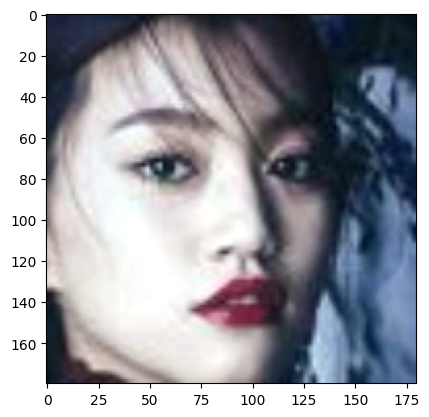

In [9]:
data_path_spring = data_path + '/봄_웜톤_cut'
data_path_summer = data_path + '/여름_쿨톤_cut'
data_path_autumn= data_path + '/가을_웜톤_cut'
data_path_winter = data_path + '/겨울_쿨톤_cut'

output_path_spring = output_path + '/봄_웜톤_wb'
output_path_summer = output_path + '/여름_쿨톤_wb'
output_path_autumn = output_path + '/가을_웜톤_wb'
output_path_winter = output_path + '/겨울_쿨톤_wb'

#funct(data_path_spring, output_path_spring)
funct(data_path_summer, output_path_summer)
funct(data_path_autumn, output_path_autumn)
funct(data_path_winter, output_path_winter)